In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gillespy2
import pickle
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import random
from scipy.special import factorial

In [2]:
#Activator +Repressor 
import gillespy2

def ToggleSwitch2D(parameter_values=None):
    # Initialize the model
    model = gillespy2.Model(name="toggle_switch_2d")

    # Define parameters
    betar_val = gillespy2.Parameter(name='betar_val', expression=10)
    Kr_val = gillespy2.Parameter(name='Kr_val', expression=50)
    nr_val = gillespy2.Parameter(name='nr_val', expression=1)
    a1_val = gillespy2.Parameter(name='a1_val', expression=0.01)
    betaa_val = gillespy2.Parameter(name='betaa_val', expression=2)  
    Ka_val = gillespy2.Parameter(name='Ka_val', expression=20)  
    na_val = gillespy2.Parameter(name='na_val', expression=1)
    a2_val = gillespy2.Parameter(name='a2_val', expression=0.02)
    model.add_parameter([betar_val, Kr_val, nr_val, a1_val, betaa_val, Ka_val, na_val, a2_val]) 

    # Define molecular species
    x1 = gillespy2.Species(name='x1', initial_value=200)
    x2 = gillespy2.Species(name='x2', initial_value=200)
    model.add_species([x1, x2])

    # Define reactions
    cu = gillespy2.Reaction(name="r1", reactants={}, products={x1: 1},
                            propensity_function="betar_val*(pow(Kr_val,nr_val)/(pow(Kr_val,nr_val)+pow(x1,nr_val)))")  
    cv = gillespy2.Reaction(name="r2", reactants={x1: 1}, products={},
                            propensity_function="a1_val*x1")
    du = gillespy2.Reaction(name="r3", reactants={}, products={x2: 1},
                            propensity_function="betaa_val*(pow(x2,na_val)/(pow(Ka_val,na_val)+pow(x2,na_val)))")  
    dv = gillespy2.Reaction(name="r4", reactants={x2: 1}, products={},
                            propensity_function="a2_val*x2")

    model.add_reaction([cu, cv, du, dv])

    tspan = gillespy2.TimeSpan.linspace(t=1000, num_points=10000)
    model.timespan(tspan)

    return model


In [3]:
model = ToggleSwitch2D()
s_results = model.run()
ssa_results = model.run(algorithm="SSA")
tau_results = model.run(algorithm="Tau-Leaping")


In [4]:
x1_ssa = ssa_results['x1']
t_ssa = ssa_results['time']
X1_ssa=x1_ssa[1000:]
X1_tau = tau_results['x2']
t_tau = tau_results['time']
X1_tau_trimmed=X1_tau[1000:]
t = ssa_results['time']

x2_ssa = ssa_results['x2']
t_ssa = ssa_results['time']
X2_ssa=x2_ssa[1000:]
X2_tau = tau_results['x2']
t_tau = tau_results['time']
X2_tau_trimmed=X2_tau[1000:]
t = ssa_results['time']


In [6]:
betar_val=10
Kr_val=50
nr_val=1
a1_val=0.01
betaa_val=2
Ka_val=20
na_val=1
a2_val=0.02
x1_0=200
x2_0=200
fT=1000
t_ori=t = np.linspace(0,fT,10000) 
dt = t[1] - t[0]
print(dt)

0.1000100010001


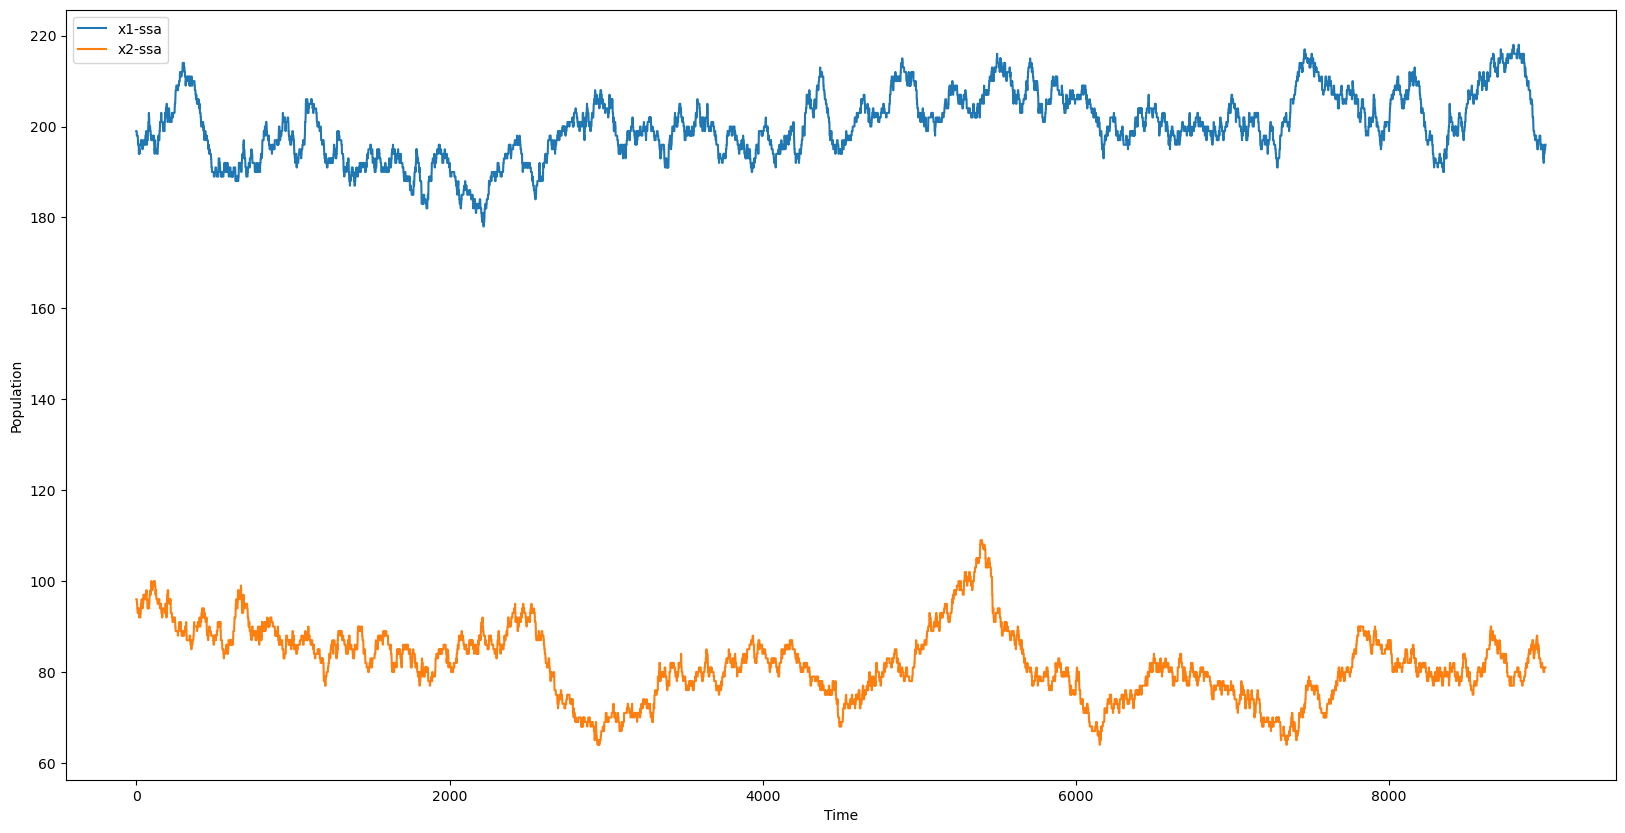

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.plot(X1_ssa, label='x1-ssa')
#plt.plot(x_tau_trimmed, label='x-tau')
#plt.plot(y_tau_trimmed, label='y-tau')
plt.plot(X2_ssa, label='x2-ssa')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')


plt.show()


In [8]:
with open('data_simulation_2D.pickle', 'wb') as f:
    
    pickle.dump([betar_val,Kr_val,nr_val,a1_val,betaa_val,Ka_val,na_val, a2_val,x1_0,x2_0,fT,t_ori,X1_ssa,X2_ssa ], f)